# Week 2 lab: Forward-Euler and Leap-Frog Methods (global errors)




This is a first notebook for Numerical Partial Differential Equations. All the labs will be in Jupyter Notebooks similar to this one. 

To **run** a cell (i.e. to typeset Markdown cells or to execute code cells), click the "<kbd>>| Run</kbd>" button on the toolbar above, or press <kbd>Ctrl</kbd> + <kbd>Enter</kbd>.


---
**📚 To learn more about Jupyter Notebooks and quick reference to markdown cell features, you can use the following links:**
* [Jupyter Notebook documentation](https://jupyter-notebook.readthedocs.io/en/stable/)
* [Markdown cheat sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
---

You will find the tasks that you are supposed to do during the lab denoted by 
🚩 **Do this and do that!**.


## Pair Programming

In our labs, you will work on computational tasks together with a partner (or small group of classmates), using a method called pair programming.

### What is pair programming?

Pair programming is a method where two people work on a coding project together. Each person has a specific role:

The **driver** writes and runs the code, and is the only person allowed to do so. They explain what they do to the navigator.
The **navigator** observes and helps the driver, spots errors in the code, gives suggestions and ideas ... They are not allowed to write code.
The two programmers decide who should "drive" first, and that person shares their screen where they write their program. The other person (navigator) watches the screen and helps the driver with the task.

Then, half-way through the lab, the driver passes the update file to the navigator, and they switch roles. You can simply share the file in Zoom right before switching the roles.

## Aims of this computer lab

* Implementing forward Euler and leapfrog solvers for simple ordinary differential equations.
* Investigating the associated errors and concepts of numerical stability.

## Forward Euler method, numerical stability and error analysis

Consider the initial value problem

\begin{equation}\label{eqn:ode}
 \frac{{\rm d}u}{{\rm d}t} = -\lambda u \quad \textrm{ for } t \in \left( 0, T \right),\\
  u \left( t = 0 \right) = 1,
\end{equation}

where $\lambda$ is a non-negative real value. 

A forward Euler discretisation of the above equation yields

\begin{equation}
  \frac{U_{n + 1} - U_n}{\Delta t} = -\lambda U_n \quad \textrm{ for } n \in \left\{ 0, \ldots, N - 1 \right\},
\end{equation}

where $U_n$ is the numerical approximation for $u_n = u \left( t = n
\Delta t \right)$, with $\Delta t = T/N$ and where $N$ is a positive integer.
The initial condition is applied via

\begin{equation}
  U_0 = 1.
\end{equation}

🚩 The cell below provides an incomplete script for implementating this forward Euler discretisation of the initial value problem, with $\lambda = 1$, $T = 10$,  and $\Delta t = 0.2$. **Complete this code using the forward Euler discretisation, and plot your numerical solution.**

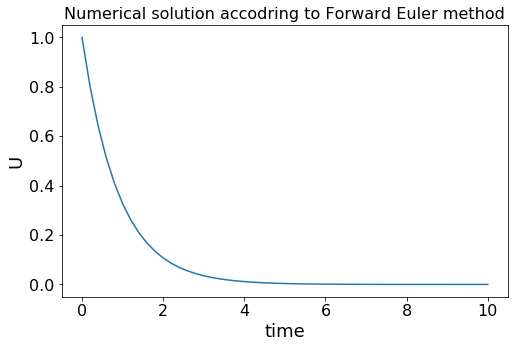

In [1]:
'''
This script finds a numerical approximation for the solution to the initial value problem:
du/dt = -\lambda*u  for  t \in (0,T),
u(t=0) = 1,
using a forward Euler discretisation.
''' 
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambdaa = 1
T = 10.0

# Time-step size and number of timesteps
dt = 0.2
N = np.int(np.floor(T/dt))

# Numpy arrays for storing time and numerical solution at each time step
U = np.empty(N+1)
t = np.empty(N+1)

# Initialisation
t[0] = 0
U[0] = 1

# Timestepping
for iTime in range(N):
    t[iTime+1] = (iTime+1)*dt
    # fill this part according to Forward Euler discretisation
    U[iTime+1] = U[iTime] + dt*(-lambdaa*U[iTime])

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t, U)

ax.set_xlabel('time', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel('U', fontsize=18)  # Add a y-label to the axes.
ax.set_title("Numerical solution according to Forward Euler method",fontsize=16) # Set the title for the plot
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

The exact solution of the initial value problem is
\begin{equation*}
  u \left( t \right) = e^{-\lambda t}.
\end{equation*}

🚩 **Using your script, plot the exact solution against your numerical solution for $\Delta t = 0.1$, $0.5$ and $0.9$**

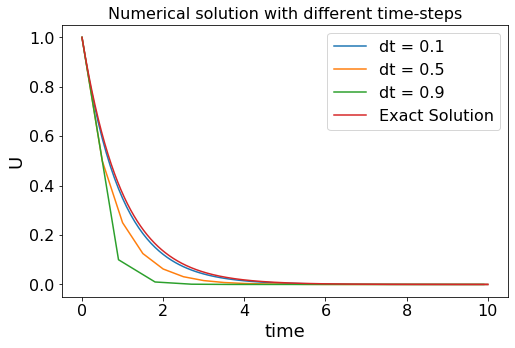

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambdaa = 1
T = 10.0
# set the figure and figure size
fig, ax = plt.subplots(figsize=(8, 5))

# loop for changing dt
for dt in [0.1, 0.5, 0.9]:
    N = np.int(np.floor(T/dt))
    # Numpy arrays for storing time and numerical solution at each time step
    U = np.empty(N+1)
    t = np.empty(N+1)
    # Initialisation
    t[0] = 0
    U[0] = 1
    # Timestepping
    for iTime in range(N):
        t[iTime+1] = (iTime+1)*dt
        U[iTime+1] = U[iTime] + dt*(-lambdaa*U[iTime])
    plot_label = 'dt = '+ str(dt) # create a label to be shown in the legend 
    ax.plot(t, U, label = plot_label)

    ax.set_xlabel('time', fontsize=18)  # Add an x-label to the axes.
    ax.set_ylabel('U', fontsize=18)   # Add a y-label to the axes.
    ax.set_title("Numerical solution with different time-steps",fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

# calculate and plot the exact solution    
t = np.linspace(0,10,1000)
Uexact = np.exp(-lambdaa*t) 
ax.plot(t, Uexact, label='Exact Solution')
ax.legend(loc='upper right', fontsize = 16)
plt.show()  

🚩**Run your code with different values of $\lambda$ and $\Delta t$, and convince yourself that the scheme is *stable* for $0 < \lambda \Delta t \leq 2$, and *unstable* for $\lambda \Delta t > 2$.**

How does the instability manifest itself? What happens for $\lambda \Delta t = 1$, for $1 < \lambda \Delta t < 2$, and for $\lambda \Delta t = 2$?

If $\lambda > 0$, what happens as $\Delta t \rightarrow 0$?


**Solution:**

For $\lambda \Delta t = 1$ the solution is zero after one step, and remains zero for the remaining timesteps. For $1 < \lambda \Delta t < 2$ the solution *undershoots* on the first step to negative values, and then oscillates
between negative and positive values, but with a deceasing amplitude on each step. For $\lambda \Delta t = 2$ the solution oscillates with a fixed amplitude
on each step. For $\lambda \Delta t > 2$ the solution exhibits an instability,
with the solution oscillating with increasing magnitude on each step.

If $\lambda > 0$ then, as $\Delta t \rightarrow 0$, the solution seems to
converge towards a solution.


---
In lectures, the **global error** is defined as the difference between the numerical and exact solutions. You can simply use the formula below to calculate global error

\begin{equation}
  e_n = U_n - u(t = n \Delta t).
\end{equation}

🚩 **Using the exact solution from previous part, plot the absolute value of global error as a function of $\Delta t$ in log-scale. To do so, keep $\lambda = 1$, $T = 10$ and vary $\Delta t$ in $[0.01,\ 0.1]$.** 

What's the slope of this plot in log-scale? Can you reason why? An easy way to check the slop in log-scale is to draw guide lines with different powers of $\Delta t$. For example, try $y = C_1 \Delta t$ and $y = C_2 (\Delta t)^2$, you can play with constants $C_1$ and $C_2$ to shift the line up and down. 

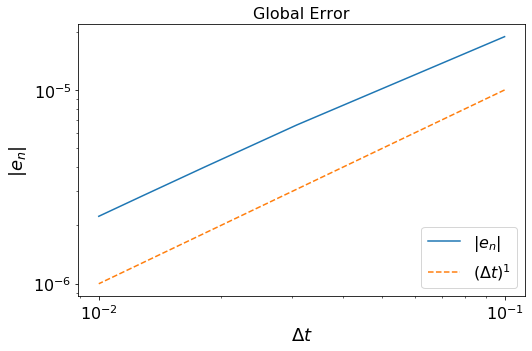

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambdaa = 1
T = 10.0
Un_exact = np.exp(-lambdaa*T)
range_N = np.linspace(100,1000,5)
range_dt = T/range_N
glob_error = np.zeros_like(range_dt)

for i, dt in enumerate(range_dt):
    N = np.int(np.floor(T/dt))
    # Numpy arrays for storing time and numerical solution at each time step
    U = np.empty(N+1)
    t = np.empty(N+1)
    # Initialisation
    t[0] = 0
    U[0] = 1
    # Timestepping
    for iTime in range(N):
        t[iTime+1] = (iTime+1)*dt
        U[iTime+1] = U[iTime] + dt*(-lambdaa*U[iTime])
    glob_error[i] = abs(Un_exact-U[-1])
    
fig, ax = plt.subplots(figsize=(8, 5))    
ax.plot(range_dt, glob_error, label = r'$|e_n|$')
ax.plot(range_dt, 0.0001*range_dt**1,linestyle='--', label = r'$(\Delta t)^1$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\Delta t$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel(r'$|e_n|$', fontsize=18)
ax.set_title("Global Error",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(loc='lower right', fontsize = 16)
plt.show() 

## The leapfrog method

An alternative discretisation for the ordinary differential equation is the
**leapfrog** method, which takes the form

\begin{equation*}
  \frac{U_{n + 1} - U_{n - 1}}{2 \Delta t} = -\lambda U_n \quad \textrm{ for } n \in \left\{ 1, \ldots, N - 1 \right\},
\end{equation*}
where $U_n$ is the numerical approximation for $u_n = u \left( t = n
\Delta t \right)$, with $\Delta t = T/N$ and where $N$ is a positive integer.
The scheme is not *self-starting* -- the equation above cannot be used for $n
= 0$ as there is no value available at negative $t$. Instead the scheme can, for
example, be started with a single forward Euler step
\begin{equation*}
  \frac{U_1 - U_0}{\Delta t} = -\lambda U_0.
\end{equation*} The initial condition is applied via
\begin{equation*}
  U_0 = 1,
\end{equation*}
as before.

In the cell below, you can see a script that is intended to implement this leapfrog discretisation of the
initial value problem, with $\lambda = 1$, $T = 10$,  and $\Delta t = 1$. The initial condition is set first, then forward Euler step, and the remaining should be the implementation of leapfrog steps, which is
missing.

🚩  **Complete the script. Run the code with this set of parameters ($\lambda = 1$, $T = 10$,  and $\Delta t = 1$). You should see a result similar to the figure below**

<img alt="Final state of the memory" src="leapfrog_example.png" width=500/>

🚩  **Investigate the stability properties of the discretisation for different values of $\Delta t$ and $T$, with $\lambda = 1$. What happens as $\Delta t \rightarrow 0$?**

**Solution**

This discretisation is not *absolutely stable* for any non-zero (real) $\lambda \Delta t$. Given a sufficiently large $T$, for any real $\lambda \Delta t \ne 0$ the solution will eventually blow-up.

For $\lambda = 1$, as $\Delta t \rightarrow 0$ the instability still manifests, although it appears at ever later values of $t$. For a fixed integration window fixed value of $T$, the numerical solution converges. However very small values of $\Delta t$ are required for convergence, particularly as larger integration windows (larger values of $T$) are considered.

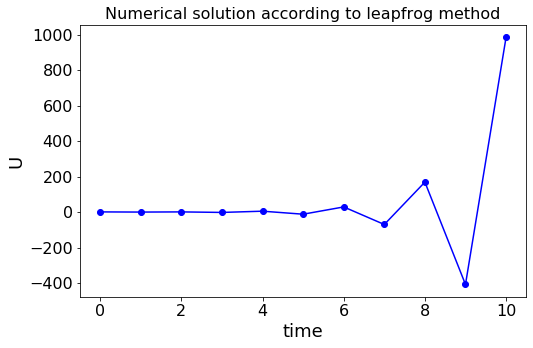

In [1]:
'''
This script finds a numerical approximation for the solution to the initial value problem:
du/dt = -\lambda*u  for  t \in (0,T),
u(t=0) = 1,
using a leapfrog discretisation, started with a single forward Euler step.
''' 
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambdaa = 1
T = 10.0

# Time-step size and number of timesteps
dt = 1
N = np.int(np.floor(T/dt))

# Numpy arrays for storing time and numerical solution at each time step
U = np.empty(N+1)
t = np.empty(N+1)

# Initialisation
t[0] = 0
U[0] = 1
t[1] = dt
U[1] = U[0]-dt*lambdaa*U[0]

# Timestepping
for iTime in range(1,N):
    t[iTime+1] = (iTime+1)*dt
    # fill this part according to leapfrog discretisation
    U[iTime+1] = U[iTime-1] + 2*dt*(-lambdaa*U[iTime])

    
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t, U, linestyle='-', marker='o', color='b')    
ax.set_xlabel('time', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel('U', fontsize=18)
ax.set_title("Numerical solution according to leapfrog method",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

🚩 **Write a similar code to Forward-Euler case to calculate the global error for the leapfrog method and plot the error as a function of time-step in log-scale.**

What do you observe? How does the slop change compared to Forward-Euler case (plot $y = \Delta t$, $y = (\Delta t)^2$ and $y = (\Delta t)^3$ to figure out)? Can you explain why?

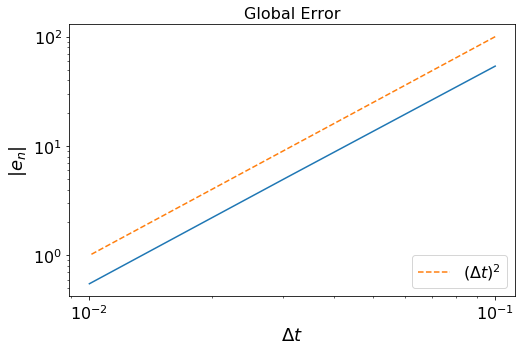

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambdaa = 1
T = 10.0
Un_exact = np.exp(-lambdaa*T)
range_N = np.linspace(100,1000,5)
range_dt = T/range_N
glob_error = np.zeros_like(range_dt)

for i, dt in enumerate(range_dt):
    N = np.int(np.floor(T/dt))
    # Numpy arrays for storing time and numerical solution at each time step
    U = np.empty(N+1)
    t = np.empty(N+1)
    # Initialisation
    t[0] = 0
    U[0] = 1
    t[1] = dt
    U[1] = U[0]-dt*lambdaa*U[0]
    # Timestepping
    for iTime in range(1,N):
        t[iTime+1] = (iTime+1)*dt
        # fill this part according to leapfrog discretisation
        U[iTime+1] = U[iTime-1] + 2*dt*(-lambdaa*U[iTime])
    glob_error[i] = abs(Un_exact-U[-1])
    
    
fig, ax = plt.subplots(figsize=(8, 5))    
ax.plot(range_dt, glob_error)
ax.plot(range_dt, 10000*range_dt**2,linestyle='--', label = r'$(\Delta t)^2$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\Delta t$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel(r'$|e_n|$', fontsize=18)
ax.set_title("Global Error",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(loc='lower right', fontsize = 16)
plt.show() 